<a href="https://colab.research.google.com/github/palak-khanna/EDA/blob/EDA-AIML/BikeDataAnalaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Load the dataset with a different encoding
data = pd.read_csv('/content/drive/MyDrive/Machine learning (personal)/Data/BikeData/SeoulBikeData.csv', encoding='latin1')


In [9]:
# Convert 'Date' column to datetime format with the correct format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [10]:
# Extract month from the 'Date' column
data['Month'] = data['Date'].dt.month

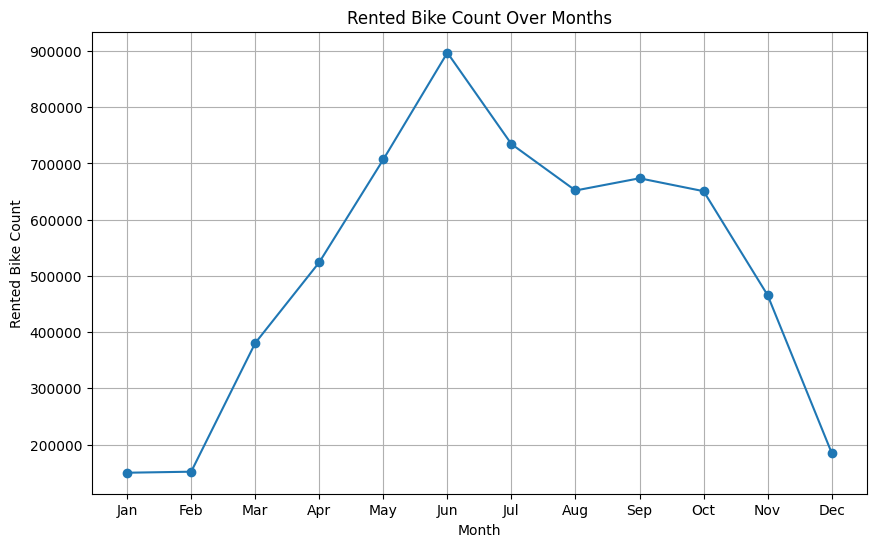

In [11]:
# Line chart of rented bike count over the months
plt.figure(figsize=(10, 6))
data.groupby('Month')['Rented Bike Count'].sum().plot(marker='o')
plt.title('Rented Bike Count Over Months')
plt.xlabel('Month')
plt.ylabel('Rented Bike Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

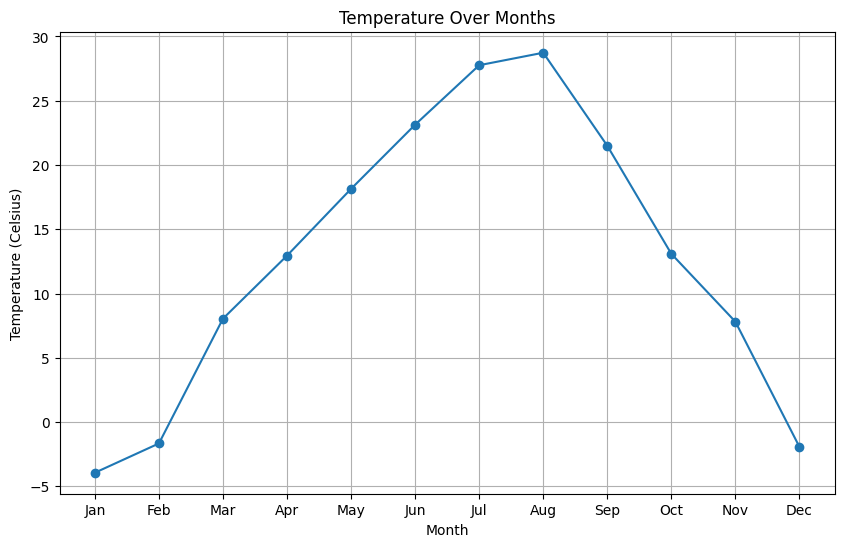

In [13]:
# Line chart of temperature over the months
plt.figure(figsize=(10, 6))
data.groupby('Month')['Temperature(°C)'].mean().plot(marker='o')
plt.title('Temperature Over Months')
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

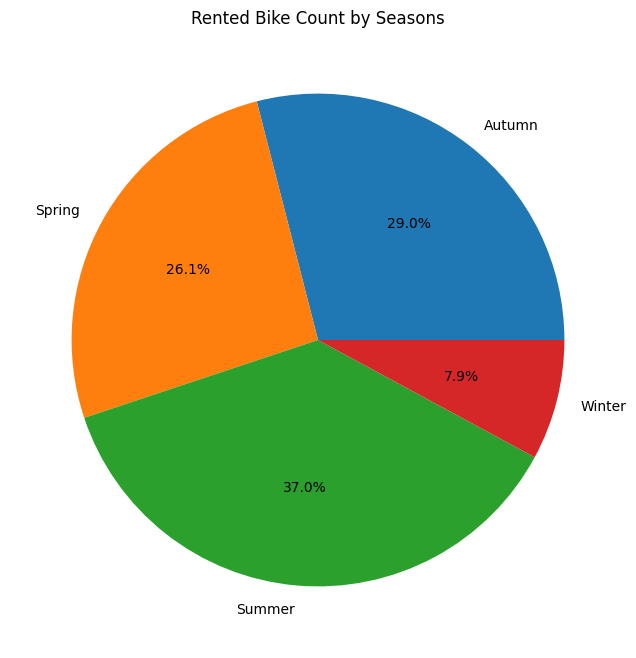

In [14]:
# Pie chart of rented bike count by seasons
plt.figure(figsize=(8, 8))
data.groupby('Seasons')['Rented Bike Count'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Rented Bike Count by Seasons')
plt.ylabel('')
plt.show()

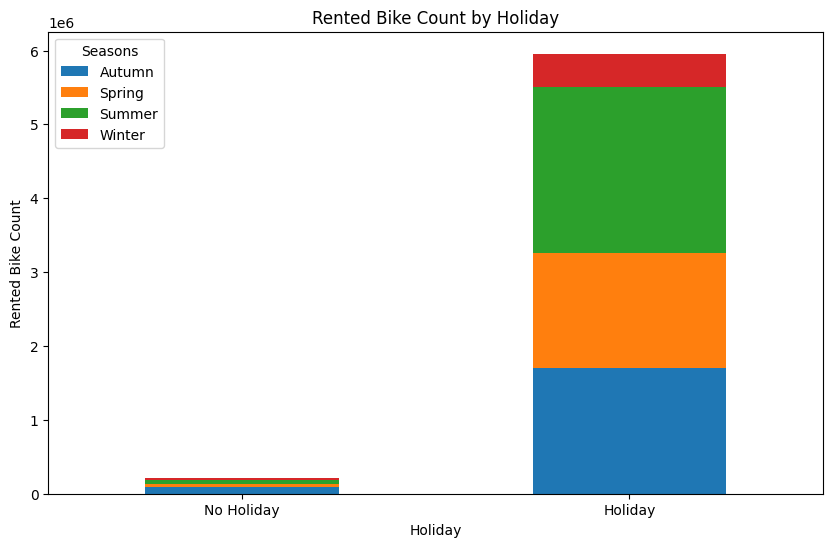

In [15]:
# Stacked bar chart of rented bike count by holiday
holiday_counts = data.groupby(['Holiday', 'Seasons'])['Rented Bike Count'].sum().unstack()
holiday_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Rented Bike Count by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.xticks([0, 1], ['No Holiday', 'Holiday'], rotation=0)
plt.legend(title='Seasons')
plt.show()

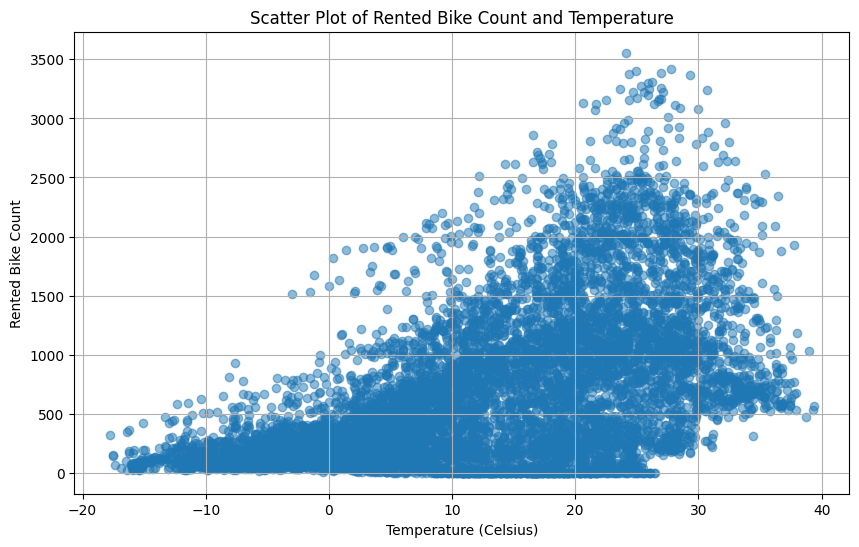

In [17]:
# Scatter plot of rented bike count and temperature
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature(°C)'], data['Rented Bike Count'], alpha=0.5)
plt.title('Scatter Plot of Rented Bike Count and Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

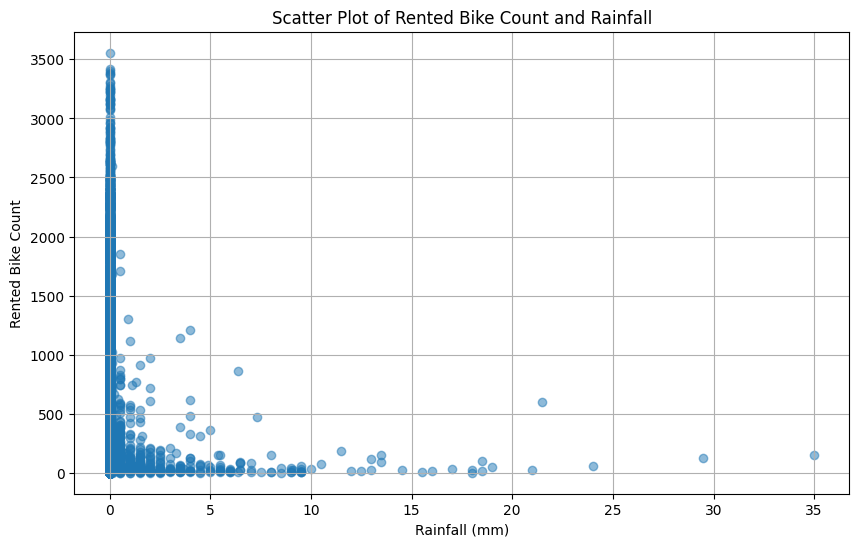

In [19]:
# Scatter plot of rented bike count and rainfall
plt.figure(figsize=(10, 6))
plt.scatter(data['Rainfall(mm)'], data['Rented Bike Count'], alpha=0.5)
plt.title('Scatter Plot of Rented Bike Count and Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

In [20]:
#1. What is the trend of rented bike count over the months?
monthly_rentals = data.groupby('Month')['Rented Bike Count'].sum()
monthly_trend = 'increasing' if monthly_rentals.diff().mean() > 0 else 'decreasing'
print("1. Trend of rented bike count over the months:", monthly_trend)

1. Trend of rented bike count over the months: increasing


In [22]:
# 2. Which seasons show greater demand for the rented bike than other seasons?

season_demand = data.groupby('Seasons')['Rented Bike Count'].sum()
max_demand_season = season_demand.idxmax()
print("2. Seasons showing greater demand for rented bikes:", max_demand_season)


2. Seasons showing greater demand for rented bikes: Summer


In [23]:
# 3. Is the demand for rented bikes affected by the holiday season?

holiday_effect = data.groupby('Holiday')['Rented Bike Count'].mean()
holiday_demand_difference = holiday_effect.diff().iloc[-1]
print("3. Effect of holiday season on rented bike demand:", holiday_demand_difference)

3. Effect of holiday season on rented bike demand: 215.471081492155


In [25]:
# 4. Relationship between rented bike demand and temperature
temperature_correlation = data['Rented Bike Count'].corr(data['Temperature(°C)'])
print("4. Relationship between rented bike demand and temperature:", temperature_correlation)

4. Relationship between rented bike demand and temperature: 0.5385581530139789


In [27]:
# 5. Relationship between rented bike demand and rainfall
rainfall_correlation = data['Rented Bike Count'].corr(data['Rainfall(mm)'])
print("5. Relationship between rented bike demand and rainfall:", rainfall_correlation)

5. Relationship between rented bike demand and rainfall: -0.12307395980285019
